<a href="https://colab.research.google.com/github/ajaypavuluri87/icp-6/blob/main/icp-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Modified autoencoder with an additional hidden layer
encoding_dim = 32  # Size of encoded representation

# Define the input placeholder (for 28x28 images flattened to 784)
input_img = Input(shape=(784,))

# Encoder
encoded = Dense(128, activation='relu')(input_img)  # First hidden layer
encoded = Dense(64, activation='relu')(encoded)     # Additional hidden layer
encoded = Dense(32, activation='relu')(encoded)     # Bottleneck layer

# Decoder
decoded = Dense(64, activation='relu')(encoded)     # Expanding from bottleneck
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)  # Reconstructing the original input

# Model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.4684 - val_loss: 0.3219
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3146 - val_loss: 0.3073
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3037 - val_loss: 0.3016
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2983 - val_loss: 0.2982
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2954 - val_loss: 0.2960
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2944 - val_loss: 0.2936
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2908 - val_loss: 0.2920
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2892 - val_loss: 0.2910
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2879 - val_loss: 0.2899
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━

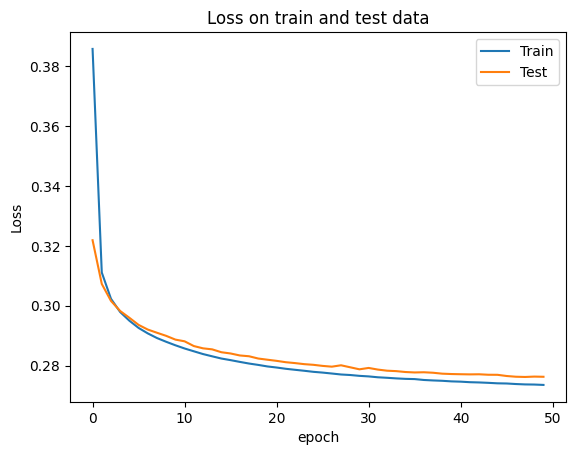

In [3]:
# plot loss and accuracy using history object

plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.title("Loss on train and test data")
plt.legend(['Train','Test'],loc='upper right')
plt.show()

In [4]:
# plot the test image
def validate_image(data):

    random_sample = np.random.choice(data.shape[0],1,replace = False)
    print(f"Tesing on image {random_sample[0]} \n")

    # plot a sample of test data
    plt.imshow(data[random_sample].reshape(28,28))
    plt.show()

    # plot the sample using reconstructed test data

    pred = autoencoder.predict(data[random_sample].reshape(-1,784))
    plt.imshow(pred.reshape(28,28))
    plt.show()

Tesing on image 3558 



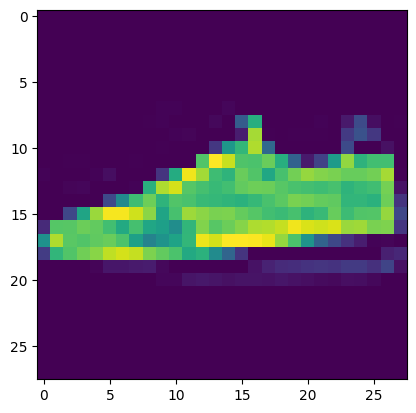

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


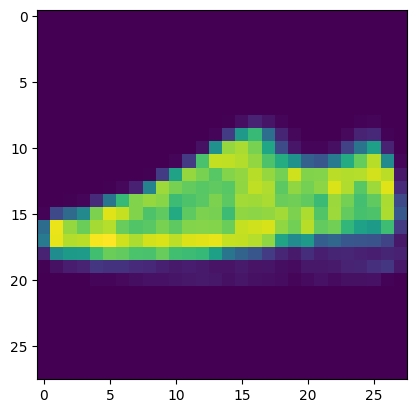

In [5]:
validate_image(x_test)